# About this dataset
## I) Dependant Variables
1. Age : Age of the patient
2. Sex : Sex of the patient
3. exang: exercise induced angina (1 = yes; 0 = no)
4. ca: number of major vessels (0-3)
5. cp : Chest Pain type chest pain type
     * Value 1: typical angina
     * Value 2: atypical angina
     * Value 3: non-anginal pain
     * Value 4: asymptomatic
6. trtbps : resting blood pressure (in mm Hg)
7. chol : cholestoral in mg/dl fetched via BMI sensor
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
9. rest_ecg : resting electrocardiographic results
     * Value 0: normal
     * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     * thalach : maximum heart rate achieved


## II) Independent Variables:
target : 
         0= less chance of heart attack 
         1= more chance of heart attack

# Importing Libraries

In [1]:
##Importing Libraries

#Libraries for Dataset Loading and Data Wrangling
import pandas as pd
import numpy as np 

#Data Visualization
import seaborn as sns
sns.set_theme(style="darkgrid")
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#Model Selection & Model Optimization
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector 

#Statistical Inference Analyis
import statsmodels.api as sm
import scipy.stats as stats

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


#Validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Filter's Warnings 
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Data Exploration

In [2]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
print(f"Number of Rows: {data.shape[0]}\nNumber of Columns: {data.shape[1]}")
data.head()

Number of Rows: 303
Number of Columns: 14


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
labels = list(data['output'].unique())
values = list(data['output'].value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

The DataSet is Balanced

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<AxesSubplot:>

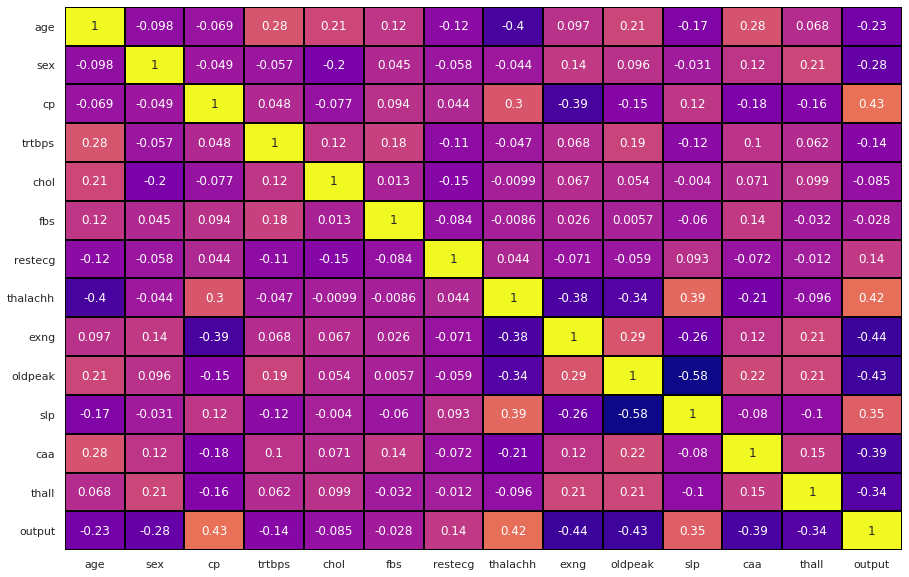

In [10]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data.corr(),annot=True,linewidths=0.4,
    linecolor='Black',
    cbar=False,cmap = 'plasma')

1. Positivily Correlated Variables:
* thalachh
* cp
* sip
* restecg
2. Negativily Correalated Variables:
* exng 
* oldpeak
* caa
* thall

<AxesSubplot:>

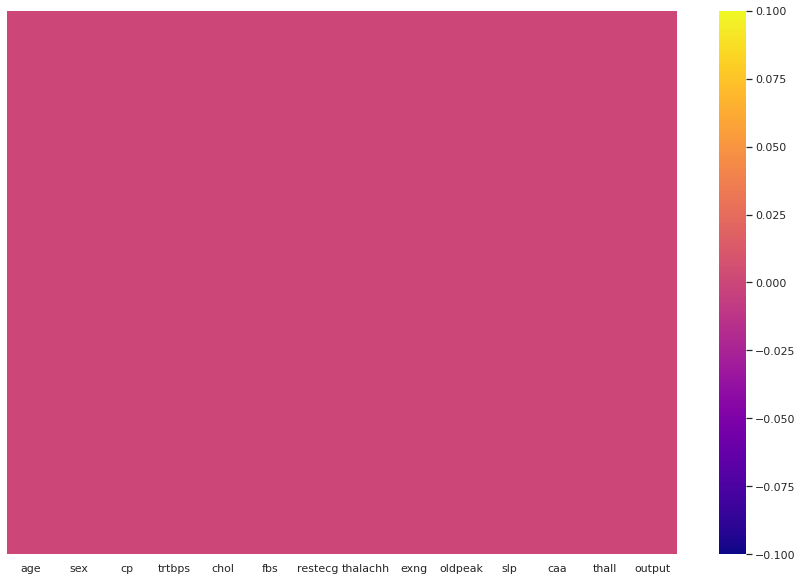

In [11]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data.isnull(),cmap = 'plasma',yticklabels = False)

The Datasets contains Zero Nulls values

# Univariate analysis

In [12]:
labels = list(data['sex'].unique())
values = list(data['sex'].value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

The number of Male(68.3%) is greater than Female(31.7%)

<AxesSubplot:title={'center':'Major Vessels'}>

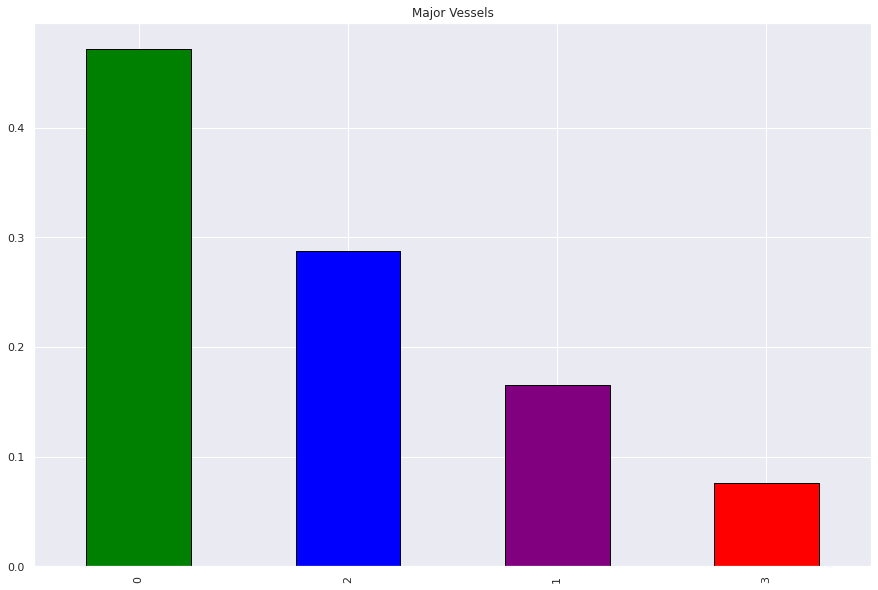

In [13]:
data['cp'].value_counts(normalize=True).plot.bar(color=['green','blue','purple','red'],edgecolor='black',title='Major Vessels')

Text(0.5, 1.0, 'Age Count')

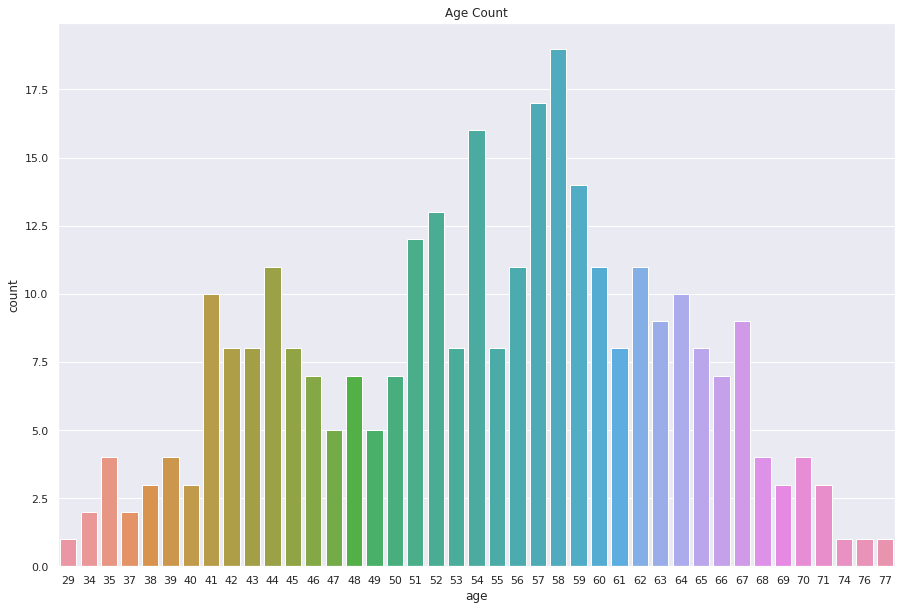

In [14]:
sns.countplot(data=data,x='age')
plt.title( 'Age Count')

<AxesSubplot:xlabel='age', ylabel='Count'>

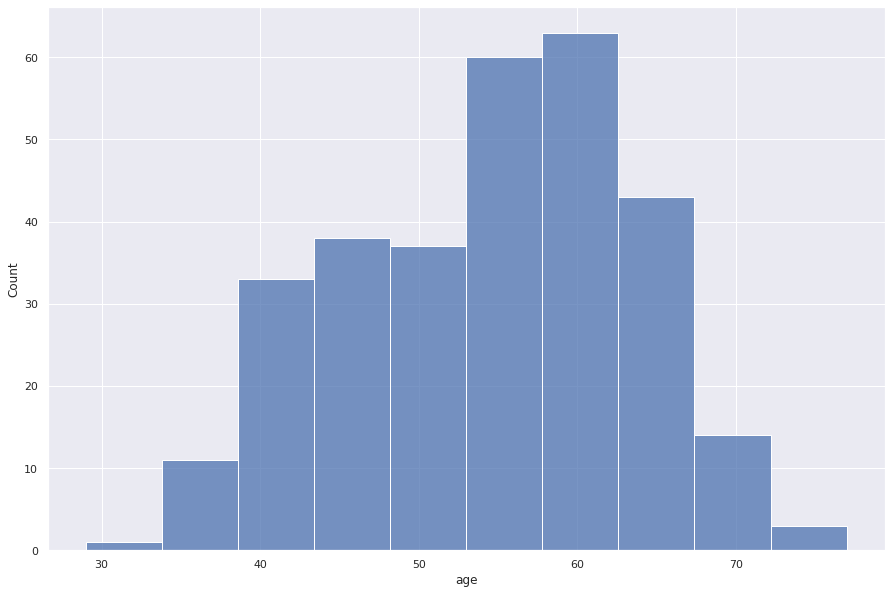

In [15]:
sns.histplot(data,x = data['age'],bins = 10,)

# Splitting the Data

In [16]:
X = data.drop('output',axis = 1)
y = data.output

In [17]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.25,shuffle = True)

# Statistical Inference & Feature Selection 

In [18]:
log_reg = sm.Logit(ytrain,Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.304047
         Iterations 8


In [19]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  227
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                           12
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:                  0.5600
Time:                        07:13:50   Log-Likelihood:                -69.019
converged:                       True   LL-Null:                       -156.85
Covariance Type:            nonrobust   LLR p-value:                 3.313e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0033      0.023      0.143      0.886      -0.042       0.049
sex           -1.4857      0.558     -2.665      0.008      -2.578      -0.393
cp             0.9161      0.238      3.851      0.0

**Note:**
age, trtbps, chol, fbs, restecg shows high p-values, under which we cannot reject the null hypothesis that it is insignificant to the dependent variables, which should be removed at first. 

In [20]:
SFS = SequentialFeatureSelector(LogisticRegression(random_state=0),n_features_to_select=7,
    direction='backward',
    scoring='roc_auc',
    cv=5).fit(Xtrain,ytrain)

In [21]:
SFS_results = pd.DataFrame({'Variable':Xtrain.columns,
                             'Chosen':SFS.get_support()})
SFS_results.head(13)

,Variable,Chosen
0,age,False
1,sex,True
2,cp,True
3,trtbps,False
4,chol,False
5,fbs,False
6,restecg,False
7,thalachh,False
8,exng,True
9,oldpeak,True


**Notes:**

Through Logistic Regression and Sequential Feature Selection, we could further consolidate our findings and hypotheses from privous Pearson Correlation heatmap.

The outcome reveals that age, trtbps, chol, fbs, restecg are the significant variables for prediction and the remaining will be conceived as insignificant noise and removed accordingly.

In [22]:
SFS_Variable = SFS_results[SFS_results['Chosen'] == True]['Variable']
log_reg = sm.Logit(ytrain, Xtrain[SFS_Variable]).fit()

Optimization terminated successfully.
         Current function value: 0.362569
         Iterations 7


In [23]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  227
Model:                          Logit   Df Residuals:                      220
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:                  0.4753
Time:                        07:13:58   Log-Likelihood:                -82.303
converged:                       True   LL-Null:                       -156.85
Covariance Type:            nonrobust   LLR p-value:                 1.205e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.1544      0.462     -2.497      0.013      -2.061      -0.248
cp             1.0776      0.208      5.169      0.000       0.669       1.486
exng          -1.0663      0.437     -2.442      0.0

# Model Evalution

In [24]:
Perfomance_df = pd.DataFrame(columns=['Model','Feature_Selection','Accuracy','Log_Loss','Roc'])
Perfomance_df.head()

,Model,Feature_Selection,Accuracy,Log_Loss,Roc


> **RandomForestClassifier(for all dependent Variables):**

In [25]:
#Pruning
alphas = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(Xtrain, ytrain)['ccp_alphas']
                    
#Pools of Parameters
random_parameters = {'n_estimators': [10,100,1000],
                     'criterion':['gini','entropy'],
                     'max_depth': [10,100,1000],
                     'max_features':["auto","sqrt", "log2"],
                     'bootstrap' :[True,False],
                     'class_weight': ["balanced", "balanced_subsample"], 
                     'ccp_alpha': alphas
                    }

#Randomized Cross Validation for Hyperparameters Tuning
RFC = RandomizedSearchCV(RandomForestClassifier(), 
                         param_distributions = random_parameters,
                         n_iter = 100,
                         scoring = 'accuracy',
                         n_jobs = 10,
                         cv = 3,
                         verbose = 2,
                         random_state=0,
                         return_train_score = True)
RFC.fit(Xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': array([0.        , 0.00432933, 0.00587372, 0.00660793, 0.00660793,
       0.00660793, 0.00671282, 0.00699252, 0.00734214, 0.00783162,
       0.00825991, 0.00976505, 0.00991189, 0.01044216, 0.01118377,
       0.01718062, 0.01752103, 0.02797216, 0.02815926, 0.0490099 ,
       0.15145634]),
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 100, 1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators':

In [26]:
Best_Parameter = RFC.best_params_


#Test the Preforamnce of Best Parameters 

RFC = RandomForestClassifier(n_estimators = Best_Parameter['n_estimators'],
                             criterion = Best_Parameter['criterion'],
                             max_depth = Best_Parameter['max_depth'],
                             max_features = Best_Parameter['max_features'],
                             bootstrap = Best_Parameter['bootstrap'],
                             class_weight = Best_Parameter['class_weight'],
                             ccp_alpha = Best_Parameter['ccp_alpha']
                            )
RFC.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.009911894273127754,
                       class_weight='balanced_subsample', max_depth=1000,
                       max_features='sqrt', n_estimators=10)

In [27]:
#Validation
pred = RFC.predict(Xtest)
Performance_df = Perfomance_df.append(pd.DataFrame([['RFC', 'Full', accuracy_score(ytest, pred), log_loss(ytest, pred), roc_auc_score(ytest, pred)]],
                                                    columns = ['Model', 'Feature Selection','Accuracy', 'Log Loss', 'ROC']), sort = False)

print('Accuracy:', accuracy_score(ytest, pred))
print('Log Loss:', log_loss(ytest, pred))
print('ROC Accuracy:', roc_auc_score(ytest, pred))
print('Confusion Matrix:\n', 
       confusion_matrix(ytest, pred))

Accuracy: 0.7631578947368421
Log Loss: 8.180352245791113
ROC Accuracy: 0.7485795454545454
Confusion Matrix:
 [[21 11]
 [ 7 37]]


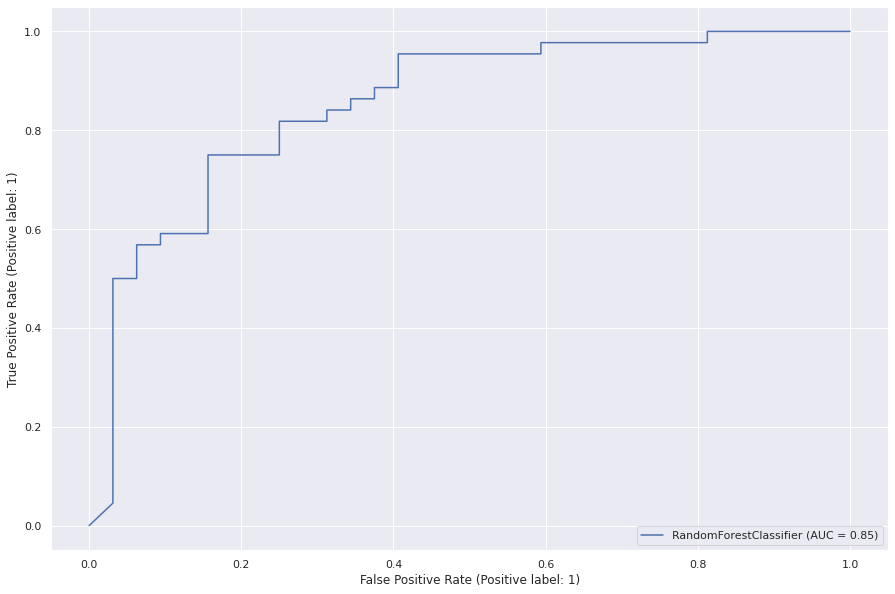

In [28]:
plot_roc_curve(RFC, Xtest, ytest)

> **RandomForest(for Selected Dependent Variables):**

In [29]:
#Find the Alpha
alphas = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(Xtrain[SFS_Variable], ytrain)['ccp_alphas']

#Pools of Parameters        
random_parameters = {'n_estimators': [10,100,1000],
                     'criterion':['gini','entropy'],
                     'max_depth': [10,100,1000],
                     'max_features':["auto","sqrt", "log2"],
                     'bootstrap' :[True,False],
                     'class_weight': ["balanced", "balanced_subsample"], 
                     'ccp_alpha': alphas
                    }
  
#Randomized Cross Validation for Hyperparameters Tuning
RFC = RandomizedSearchCV(RandomForestClassifier(), 
                         param_distributions = random_parameters,
                         n_iter = 100,
                         scoring = 'accuracy',
                         n_jobs = 10,
                         cv = 3,
                         verbose = 2,
                         random_state=0,
                         return_train_score = True)
RFC.fit(Xtrain[SFS_Variable], ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': array([0.        , 0.00029369, 0.00077093, 0.00088106, 0.00146843,
       0.00195791, 0.00220264, 0.0023862 , 0.00247797, 0.00253952,
       0.00266987, 0.00287927, 0.00288871, 0.00295354, 0.00401641,
       0.0041978 , 0.00440529, 0.00521292, 0.00550661, 0.00810995,
       0.00819611, 0.00982376, 0.01718062, 0.01752103, 0.02797216,
       0.02815926, 0.0490099 , 0.15145634]),
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 100, 1000],
                                        'max_features': ['auto', 'sqrt',
                              

In [30]:
Best_Parameter = RFC.best_params_

#Test the Preforamnce of Best Parameters 
RFC = RandomForestClassifier(n_estimators = Best_Parameter['n_estimators'],
                             criterion = Best_Parameter['criterion'],
                             max_depth = Best_Parameter['max_depth'],
                             max_features = Best_Parameter['max_features'],
                             bootstrap = Best_Parameter['bootstrap'],
                             class_weight = Best_Parameter['class_weight'],
                             ccp_alpha = Best_Parameter['ccp_alpha']
                            )
RFC.fit(Xtrain[SFS_Variable], ytrain)

RandomForestClassifier(ccp_alpha=0.04900990453489101,
                       class_weight='balanced_subsample', max_depth=1000,
                       n_estimators=1000)

In [31]:
#Validation
pred = RFC.predict(Xtest[SFS_Variable])
Performance_df = Performance_df.append(pd.DataFrame([['RFC', 'Selected', accuracy_score(ytest, pred), log_loss(ytest, pred), roc_auc_score(ytest, pred)]],
                                                    columns = ['Model', 'Feature Selection','Accuracy', 'Log Loss', 'ROC']), sort = False)

print('Accuracy:', accuracy_score(ytest, pred))
print('Log Loss:', log_loss(ytest, pred))
print('ROC Accuracy:', roc_auc_score(ytest, pred))
print('Confusion Matrix:\n', 
       confusion_matrix(ytest, pred))

Accuracy: 0.8421052631578947
Log Loss: 5.453596219910923
ROC Accuracy: 0.8210227272727273
Confusion Matrix:
 [[22 10]
 [ 2 42]]


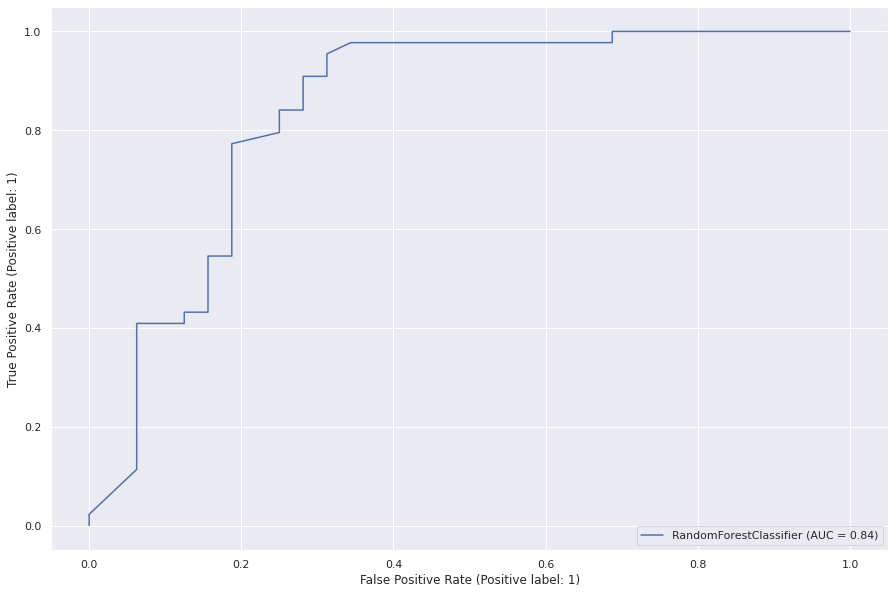

In [32]:
plot_roc_curve(RFC,Xtest[SFS_Variable], ytest)